# Weighting, Matching, or Regression?

*Comparing different methods to condition causal inference on covariates*

INTRO

## Example

Assume we were a firm interested in understanding the effect of $D$ on $Y$. Unfortunately, we cannot randomize $D$. Unfortunately we cannot randomize $D$. 

We can represent the data generating process with the following [**Directed Acyclic Graph (DAG)**](https://towardsdatascience.com/b63dc69e3d8c). If you are not familiar with DAGs, I have written a short [introduction here](https://towardsdatascience.com/b63dc69e3d8c).

```mermaid
flowchart TB
classDef included fill:#DCDCDC,stroke:#000000,stroke-width:2px;
classDef excluded fill:#ffffff,stroke:#000000,stroke-width:2px;
classDef unobserved fill:#ffffff,stroke:#000000,stroke-width:2px,stroke-dasharray: 5 5;

X1((gender))
X2((age))
X3((income))
D((treatment))
Y((outcome))

D --> Y
X1 --> D
X1 --> Y
X2 --> Y
X2 --> D
X3 --> Y
X3 --> D

class D,Y included;
class X1,X2,X3 excluded;
```

We can now generate the simulated data, using the data generating process `dgp_ipw()` from [`src.dgp`](https://github.com/matteocourthoud/Blog-Posts/blob/main/notebooks/src/dgp.py). I also import some plotting functions and libraries from [`src.utils`](https://github.com/matteocourthoud/Blog-Posts/blob/main/notebooks/src/utils.py).

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from src.utils import *
from src.dgp import dgp_ipw

In [3]:
df = dgp_ipw().generate_data()
df.head()

,outcome,treated,male,age,income
0,26.10,True,0,39.0,2035.0
1,38.49,True,1,22.0,1384.0
2,23.69,False,0,22.0,1361.0
3,37.24,True,0,32.0,2942.0
4,26.43,False,0,47.0,2426.0


We have informations on 1000 individuals indexed by `i` for whom we observe the revenue generated pre and post treatment, `revenue0` and `revenue1` respectively, and whether they have been exposed to the `ad_campaign`.

Are the covariates balanced?

In [5]:
from causalml.match import create_table_one

cols = ['outcome', 'male', 'age', 'income']
create_table_one(df, 'treated', cols)

,Control,Treatment,SMD
Variable,,,
n,451,549,
age,32.58 (8.14),31.81 (8.57),-0.0912
income,1858.53 (568.18),1963.41 (589.27),0.1812
male,0.45 (0.50),0.56 (0.50),0.2209
outcome,23.07 (5.20),28.67 (5.30),1.0678


Another way to visually observe all the differences at once is with a paired violinplot.

In [7]:
df_long = df
df_long[cols] =(df_long[cols] - df_long[cols].mean()) / df_long[cols].std()
df_long = pd.melt(df_long, id_vars='treated', value_name='value')
df_long

,treated,variable,value
0,True,outcome,-0.007683
1,True,outcome,2.076080
2,False,outcome,-0.412999
3,True,outcome,1.865854
4,False,outcome,0.047817
...,...,...,...
3995,True,income,-0.048306
3996,False,income,-0.280300
3997,True,income,0.972468
3998,True,income,0.063395


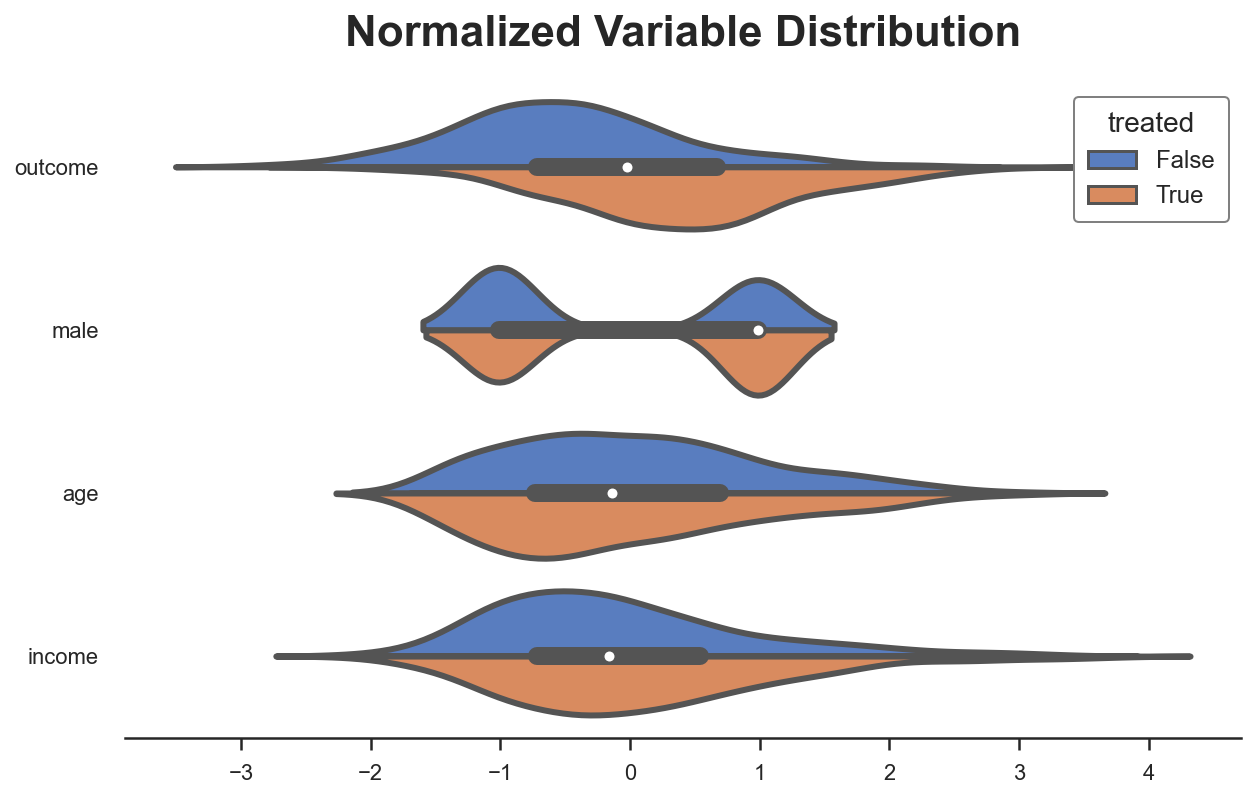

In [8]:
sns.violinplot(y="variable", x="value", hue="treated", data=df_long, palette="muted", split=True).\
    set(xlabel="", ylabel="", title="Normalized Variable Distribution");

If we do not control for the observable characteristics, we are unable to estimate the true treatment effect.

```mermaid
flowchart TB
classDef included fill:#DCDCDC,stroke:#000000,stroke-width:2px;
classDef excluded fill:#ffffff,stroke:#000000,stroke-width:2px;
classDef unobserved fill:#ffffff,stroke:#000000,stroke-width:2px,stroke-dasharray: 5 5;

X1((gender))
X2((age))
X3((income))
D((treatment))
Y((outcome))



linkStyle 0 stroke:#00ff00,stroke-width:4px;
linkStyle 1,2,3,4,5,6 stroke:#ff0000,stroke-width:4px;
class D,Y included;
class X1,X2,X3 excluded;
```

By controlling for observable characteristics, we "block" the backdoor paths and we are able to recover the causal effect of $D$ on $Y$.

```mermaid
flowchart TB
classDef included fill:#DCDCDC,stroke:#000000,stroke-width:2px;
classDef excluded fill:#ffffff,stroke:#000000,stroke-width:2px;
classDef unobserved fill:#ffffff,stroke:#000000,stroke-width:2px,stroke-dasharray: 5 5;

X1((gender))
X2((age))
X3((income))
D((treatment))
Y((outcome))

D --> Y
X1 --> D
X1 --> Y
X2 --> D
X2 --> Y
X3 --> Y
X3 --> D

linkStyle 0 stroke:#00ff00,stroke-width:4px;
class D,Y,X1,X2,X3 included;
```

How do we do it? We have some options:

- Matching
- Propensity score weighting
- Regression with control variables

How do the methods work and what are the differences?

## Propensity Score

## Conclusion

TBD

### References

TBD

### Related Articles

- [Understanding The Frisch-Waugh-Lovell Theorem](https://towardsdatascience.com/59f801eb3299)
- [Understanding Contamination Bias](https://towardsdatascience.com/58b63d25d2ef)
- [DAGs and Control Variables](https://towardsdatascience.com/b63dc69e3d8c)

### Code

You can find the original Jupyter Notebook here:

https://github.com/matteocourthoud/Blog-Posts/blob/main/notebooks/ipw.ipynb